In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [45]:
len(glove_model.wv.vocab)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


400000

In [3]:
glove_model["beautiful"].size

300

In [35]:
glove_model.most_similar("banana")

[('bananas', 0.6691170930862427),
 ('mango', 0.580410361289978),
 ('pineapple', 0.5492371916770935),
 ('coconut', 0.5462779402732849),
 ('papaya', 0.541056752204895),
 ('fruit', 0.5218108296394348),
 ('growers', 0.4877638816833496),
 ('nut', 0.4839959144592285),
 ('peanut', 0.48062020540237427),
 ('potato', 0.4806118607521057)]

In [5]:
glove_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)

[('king', 0.6770139336585999)]

In [46]:
examples = ["he boy she", "big bigger bad", "going went seeing"]

In [60]:
glove_model.wv.doesnt_match(words=("USA ,Italy ,Iran ,France, apple").split())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'apple'

In [52]:
for example in examples:
  a, b, x = example.split()
  predicted = glove_model.most_similar([x, b], [a])[0][0]
  print ("'%s' is to '%s' as '%s' is to '%s' " % (a, b, x, predicted))

'he' is to 'boy' as 'she' is to 'girl' 
'big' is to 'bigger' as 'bad' is to 'worse' 
'going' is to 'went' as 'seeing' is to 'saw' 


In [7]:
glove_model.wv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


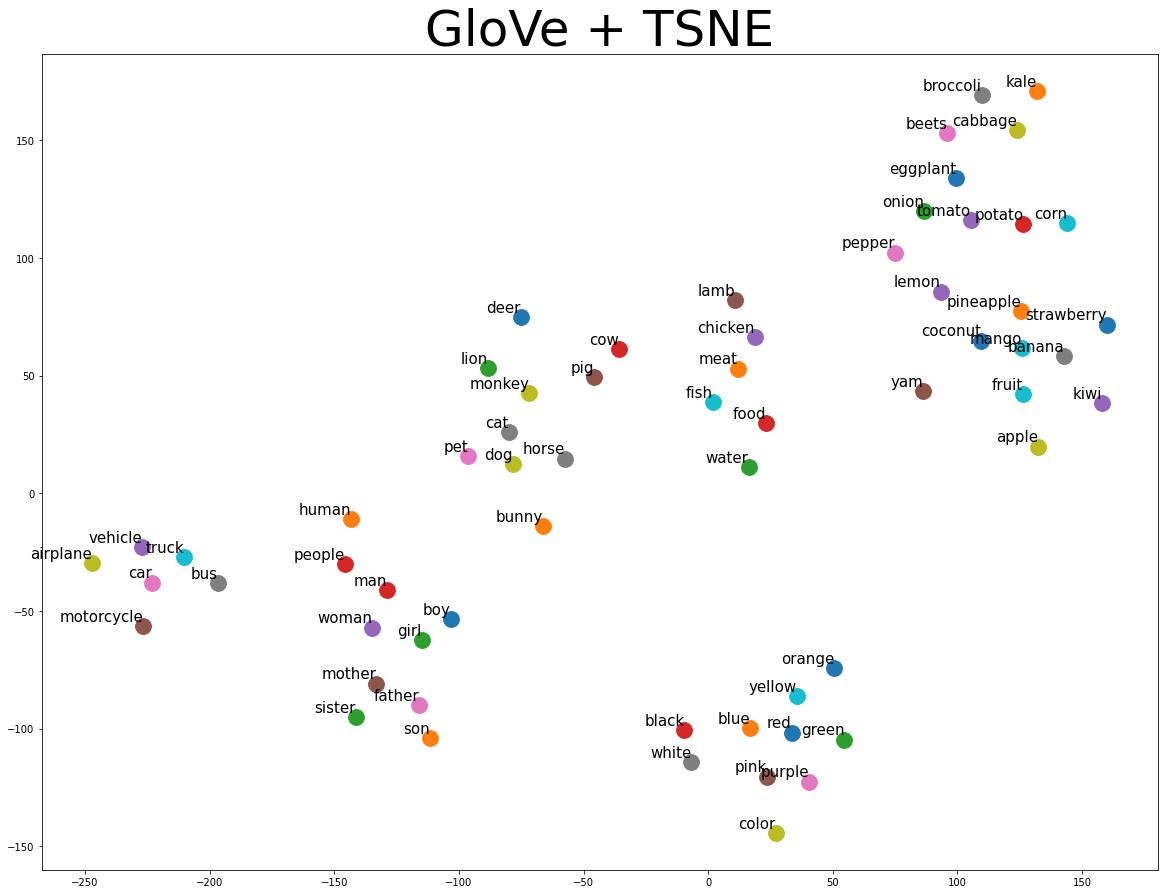

In [43]:
vocab = ["boy","human", "girl", "man", "woman","mother","father",
          "banana", "apple", "fruit", "orange" , "son" , 
         "sister", "food", "chicken","lamb"  , "pepper"
         ,"cat","dog","fish","deer","bunny" ,"lion","cow" ,"kiwi",
         "pig"   , "beets" ,"broccoli","cabbage" , "corn" , "eggplant" ,
         "kale", "onion", "potato","tomato", "yam" , "car" , "bus" , "airplane",
         "truck"  ,"strawberry","meat","water" , "people" ,"vehicle",
         "motorcycle","pet","horse","monkey" ,"yellow","red","blue","green","black",
         "lemon","pink","purple","white","color" ,"mango","coconut" ,"pineapple"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20,15)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i], s=250)
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',fontsize=15)
    plt.title('GloVe + TSNE',fontdict = {'fontsize' : 50})
    plt.show()

tsne_plot(glove_model)